In [42]:
#for reading Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [62]:
#reading the file
df = pd.read_csv("C:/Users/TD Design/Documents/ExploreAI/train_set.csv")

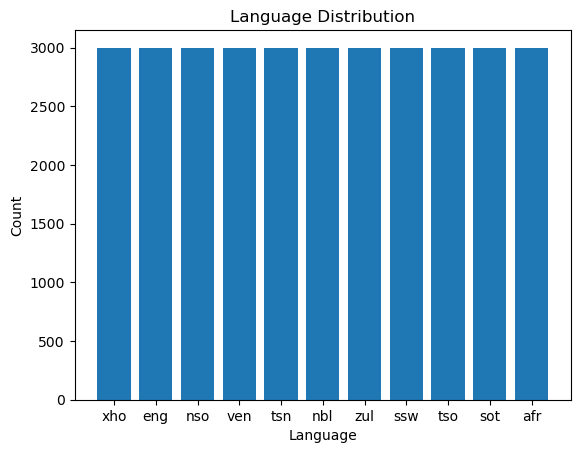

In [63]:
language_counts = df['lang_id'].value_counts()
plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Distribution')
plt.show()


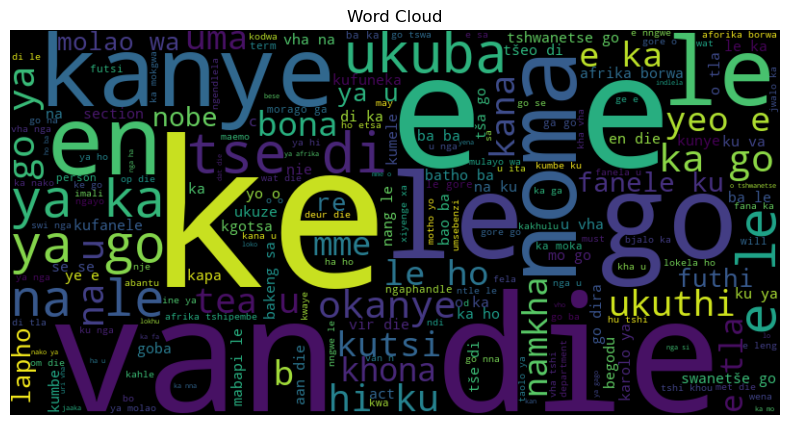

In [64]:
all_text = " ".join(df['text'])
wordcloud = WordCloud(width=800, height=400).generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


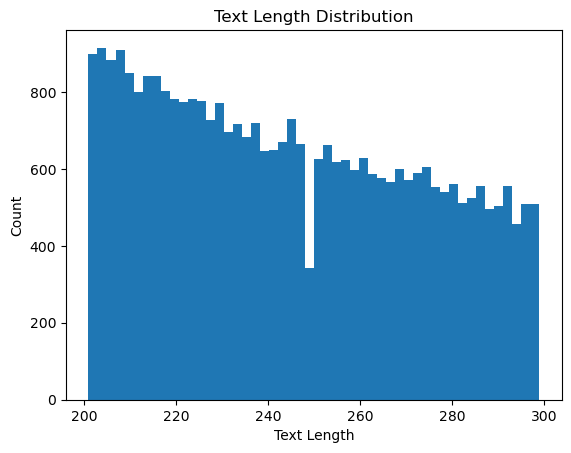

In [65]:
text_lengths = df['text'].str.len()
plt.hist(text_lengths, bins=50)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Text Length Distribution')
plt.show()


In [81]:
# Split the data into training and testing sets
X = df['text']
y = df['lang_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [83]:
# Model 2: Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vectorized, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test_vectorized)

In [84]:
# Model 3: Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_vectorized, y_train)
random_forest_predictions = random_forest_model.predict(X_test_vectorized)

In [80]:
# S
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

print('Logistic Regression Accuracy:', logistic_accuracy)
print('Naive Bayes Accuracy:', naive_bayes_accuracy)
print('Random Forest Accuracy:', random_forest_accuracy)


ValueError: Found input variables with inconsistent numbers of samples: [6600, 33000]

In [72]:
dt = pd.read_csv("C:/Users/TD Design/Documents/ExploreAI/train_set.csv")

In [73]:
# Preprocess the test data
X_test = dt['text']

# Vectorize the test data using the same vectorizer as the training data
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions using the trained models
logistic_predictions = logistic_model.predict(X_test_vectorized)
naive_bayes_predictions = naive_bayes_model.predict(X_test_vectorized)
random_forest_predictions = random_forest_model.predict(X_test_vectorized)

# Print the predictions
print('Logistic Regression Predictions:', logistic_predictions)
print('Naive Bayes Predictions:', naive_bayes_predictions)
print('Random Forest Predictions:', random_forest_predictions)


Logistic Regression Predictions: ['xho' 'xho' 'eng' ... 'eng' 'xho' 'sot']
Naive Bayes Predictions: ['xho' 'xho' 'eng' ... 'eng' 'xho' 'sot']
Random Forest Predictions: ['xho' 'xho' 'eng' ... 'eng' 'xho' 'sot']


In [74]:
X_test['Ngingu Malusi Ntombela Isbongo'] =random_forest_predictions

In [75]:
X_test.to_csv("Languege_predict.csv")